In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np

In [2]:
dirname = 'C:/Users/Holger/PycharmProjects/water-quality-modeling/data'

wq_df = pd.read_csv(os.path.join(dirname, 'full_original_data.csv'), sep=';')
wq_df.head()

C:\Users\Holger\Anaconda3\envs\water-quality-env\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,lat,lon,date,station_id,param_code,param_desc,value,unit,origin
0,-25.9183,-54.621667,2001-02-27,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat
1,-25.9183,-54.621667,2001-03-19,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat
2,-25.9183,-54.621667,2001-04-23,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat
3,-25.9183,-54.621667,2001-05-28,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat
4,-25.9183,-54.621667,2001-06-25,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat


In [3]:
wq_df['unit'].replace(np.nan, '', inplace=True, regex=True)

In [4]:
origins = wq_df['origin'].unique()
origins

array(['GEMStat', 'Waterbase', 'GLORICH'], dtype=object)

In [5]:
params = wq_df['param_code'].unique()
params

array(['NO2', 'TSS', 'DO_mgL', 'DOSAT', 'TP', 'TDP', 'Temp_water', 'pH',
       'NO3', 'TN', 'TDN', 'Hg', 'DOC', 'As', 'SO4', 'TOC', 'HCO3', 'TIC'],
      dtype=object)

In [6]:
wq_df['skew'] = wq_df['value'].groupby(wq_df['param_code']).transform('skew')
wq_df.head()

,lat,lon,date,station_id,param_code,param_desc,value,unit,origin,skew
0,-25.9183,-54.621667,2001-02-27,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376
1,-25.9183,-54.621667,2001-03-19,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376
2,-25.9183,-54.621667,2001-04-23,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376
3,-25.9183,-54.621667,2001-05-28,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376
4,-25.9183,-54.621667,2001-06-25,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376


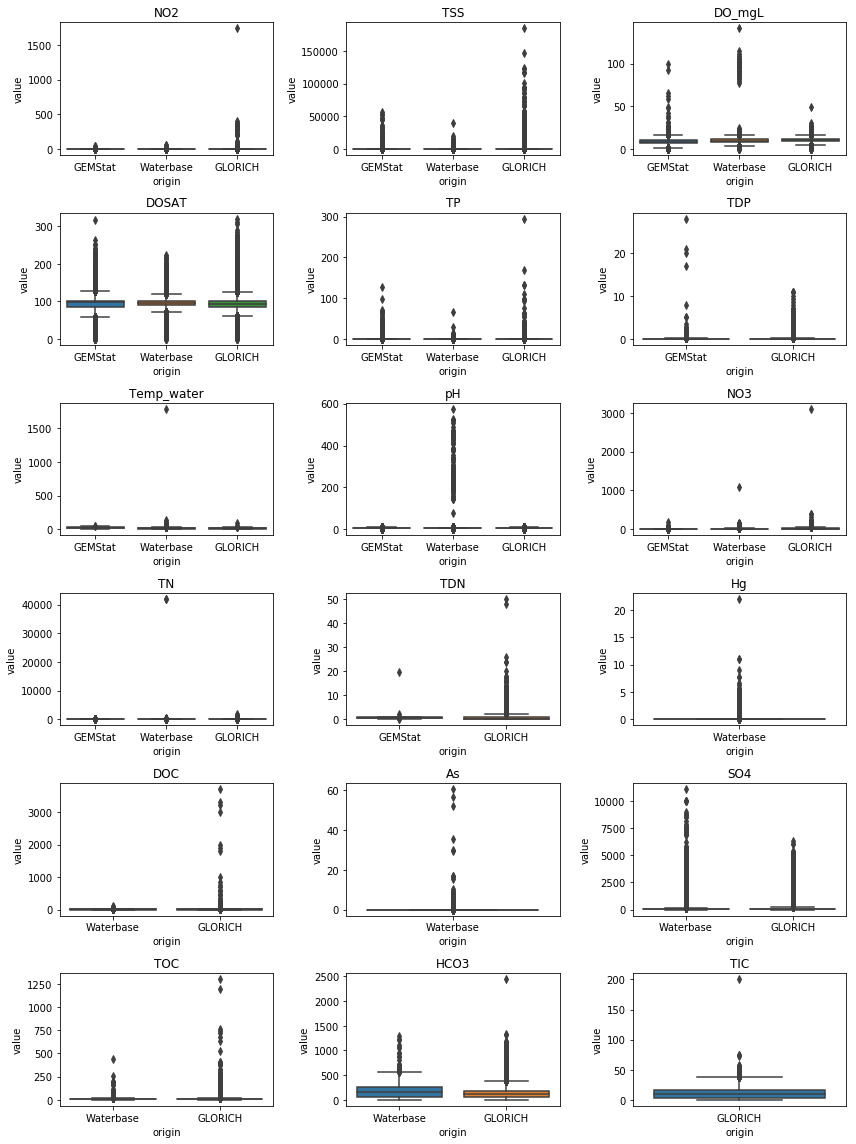

In [7]:
# Create the figure
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(12, 16))

# Loop over parameters and figure axes
for param, ax in zip(params, axes.flat):
    # Subset the values of the parameter
    subset = wq_df[wq_df['param_code'] == param]
    sns.boxplot(x='origin', y='value', data=subset, ax=ax)
    ax.set_title(param)
fig.tight_layout()

In [8]:
wq_df.groupby('param_code')['value'].quantile([.99])

param_code      
As          0.99       0.023000
DOC         0.99      19.998331
DOSAT       0.99     138.000000
DO_mgL      0.99      14.200000
HCO3        0.99     394.000000
Hg          0.99       0.015000
NO2         0.99       1.369994
NO3         0.99      43.100000
SO4         0.99    1000.025041
TDN         0.99       6.401505
TDP         0.99       1.399813
TIC         0.99      43.996341
TN          0.99      12.002829
TOC         0.99      32.997247
TP          0.99       2.400000
TSS         0.99    1020.000000
Temp_water  0.99      30.000000
pH          0.99       8.800000
Name: value, dtype: float64

In [9]:
trim_df = pd.read_csv(os.path.join(dirname, 'trimming_criteria.csv'), sep=';')
trim_dict = dict(zip(trim_df['param_code'], trim_df['upper_limit']))
trim_dict

{'DOC': nan,
 'DOSAT': 1500.0,
 'DO_mgL': 70.0,
 'HCO3': nan,
 'NO2': 9.852,
 'NO3': 500.251,
 'SO4': 5000.0,
 'TIC': nan,
 'TDN': nan,
 'TDP': nan,
 'TN': 200.0,
 'TOC': nan,
 'TP': 10.0,
 'Temp_water': 54.0,
 'TSS': nan,
 'pH': 14.0,
 'Hg': 0.024,
 'As': 3.6}

In [10]:
subsets = []

for param in params:
    subset = wq_df[wq_df['param_code'] == param]
    limit = trim_dict.get(param)
    subset.drop(subset[subset['value'] > limit].index, inplace=True)
    subsets.append(subset)

wq_df = pd.concat(subsets)
wq_df.head()

C:\Users\Holger\Anaconda3\envs\water-quality-env\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,lat,lon,date,station_id,param_code,param_desc,value,unit,origin,skew
0,-25.9183,-54.621667,2001-02-27,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376
1,-25.9183,-54.621667,2001-03-19,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376
2,-25.9183,-54.621667,2001-04-23,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376
3,-25.9183,-54.621667,2001-05-28,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376
4,-25.9183,-54.621667,2001-06-25,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376


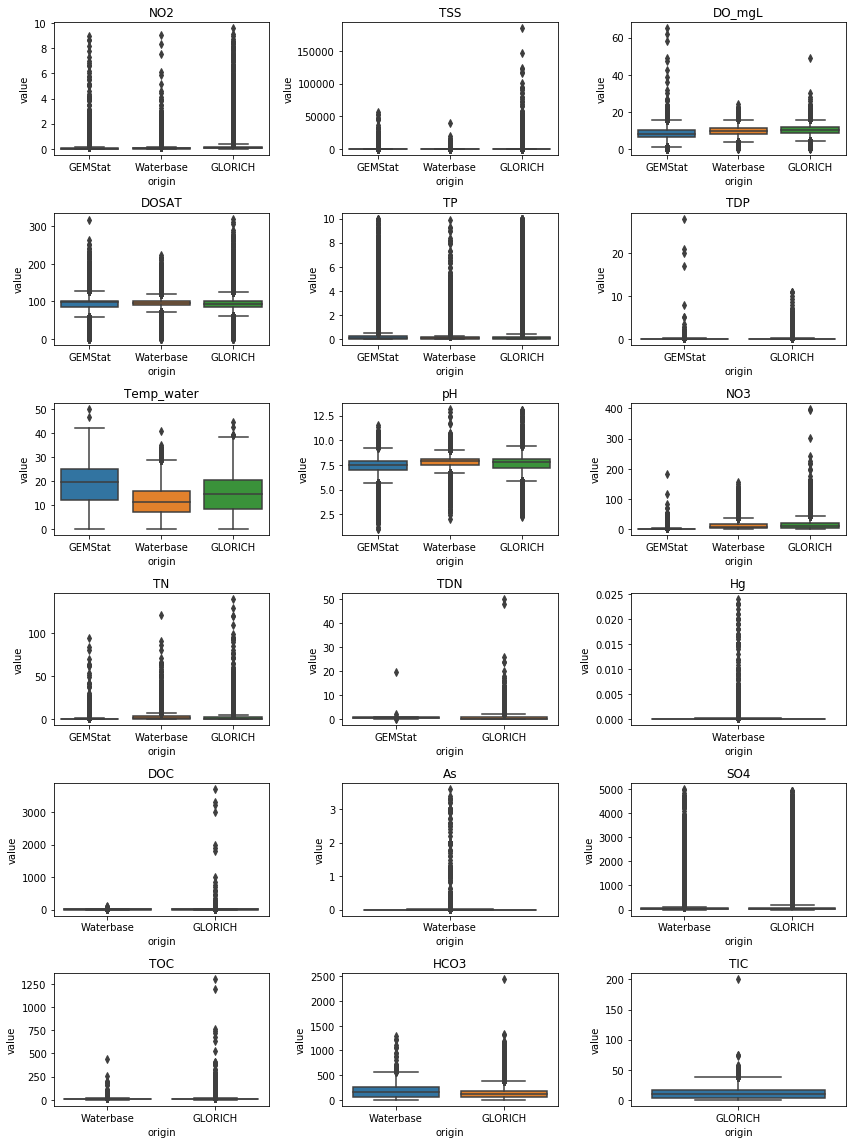

In [11]:
# Create the figure
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(12, 16))

# Loop over parameters and figure axes
for param, ax in zip(params, axes.flat):
    # Subset the values of the parameter
    subset = wq_df[wq_df['param_code'] == param]
    sns.boxplot(x='origin', y='value', data=subset, ax=ax)
    ax.set_title(param)
fig.tight_layout()

In [17]:
wq_df['month'] = pd.to_datetime(wq_df['date']).dt.month
wq_df.head()

,lat,lon,date,station_id,param_code,param_desc,value,unit,origin,skew,month
0,-25.9183,-54.621667,2001-02-27,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376,2
1,-25.9183,-54.621667,2001-03-19,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376,3
2,-25.9183,-54.621667,2001-04-23,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376,4
3,-25.9183,-54.621667,2001-05-28,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376,5
4,-25.9183,-54.621667,2001-06-25,ARG00001,NO2,"Nitrite concentration, dissolved",0.005,ppm,GEMStat,213.408376,6


In [18]:
group_cols = list(wq_df)
group_cols.remove('date')
group_cols.remove('value')
group_cols.remove('skew')
group_cols

['lat',
 'lon',
 'station_id',
 'param_code',
 'param_desc',
 'unit',
 'origin',
 'month']

In [19]:
monthly_df = wq_df.groupby(group_cols)['value'].agg(['count', 'mean', 'std']).reset_index()
monthly_df.head()

,lat,lon,station_id,param_code,param_desc,unit,origin,month,count,mean,std
0,-51.631209,-69.614792,202026,DOSAT,Oxygen saturation,%,GLORICH,1,4,78.775000,21.956074
1,-51.631209,-69.614792,202026,DO_mgL,Dissolved oxygen concentration,ppm,GLORICH,1,5,10.280000,1.926655
2,-51.631209,-69.614792,202026,HCO3,Bicarbonate ion concentration,ppm,GLORICH,1,5,44.302070,8.271434
3,-51.631209,-69.614792,202026,NO3,"Nitrate concentration, dissolved",ppm,GLORICH,1,1,5.699536,NaN
4,-51.631209,-69.614792,202026,SO4,"Sulphate concentration, dissolved",ppm,GLORICH,1,3,3.166554,4.200222


In [20]:
monthly_df['cv'] = monthly_df['std'] / monthly_df['mean']
monthly_df.head()

,lat,lon,station_id,param_code,param_desc,unit,origin,month,count,mean,std,cv
0,-51.631209,-69.614792,202026,DOSAT,Oxygen saturation,%,GLORICH,1,4,78.775000,21.956074,0.278719
1,-51.631209,-69.614792,202026,DO_mgL,Dissolved oxygen concentration,ppm,GLORICH,1,5,10.280000,1.926655,0.187418
2,-51.631209,-69.614792,202026,HCO3,Bicarbonate ion concentration,ppm,GLORICH,1,5,44.302070,8.271434,0.186705
3,-51.631209,-69.614792,202026,NO3,"Nitrate concentration, dissolved",ppm,GLORICH,1,1,5.699536,NaN,NaN
4,-51.631209,-69.614792,202026,SO4,"Sulphate concentration, dissolved",ppm,GLORICH,1,3,3.166554,4.200222,1.326433


In [21]:
print(len(monthly_df))
monthly_df = monthly_df[monthly_df['cv'] < 0.5]
print(len(monthly_df))

1169461
581510


In [22]:
monthly_df['skew'] = monthly_df['mean'].groupby(monthly_df['param_code']).transform('skew')
monthly_df.head()

,lat,lon,station_id,param_code,param_desc,unit,origin,month,count,mean,std,cv,skew
0,-51.631209,-69.614792,202026,DOSAT,Oxygen saturation,%,GLORICH,1,4,78.775000,21.956074,0.278719,-1.675788
1,-51.631209,-69.614792,202026,DO_mgL,Dissolved oxygen concentration,ppm,GLORICH,1,5,10.280000,1.926655,0.187418,-0.211500
2,-51.631209,-69.614792,202026,HCO3,Bicarbonate ion concentration,ppm,GLORICH,1,5,44.302070,8.271434,0.186705,0.863927
6,-51.631209,-69.614792,202026,pH,pH,,GLORICH,1,5,6.872000,0.385318,0.056071,-1.369483
7,-51.147976,-69.530973,202024,DOSAT,Oxygen saturation,%,GLORICH,1,3,100.333333,13.613719,0.135685,-1.675788


In [23]:
from scipy import stats

# List of subsets
subsets = []

# Loop over parameters
for param in params:
    # Subset the values of the parameter
    subset = monthly_df[monthly_df['param_code'] == param]
    print(len(subset['station_id'].unique()))
    # Perform the power transformation and get the transformed values as the first and the optimized lambda value as the 
    # second output
    pt_values, lmbda = stats.boxcox(subset['mean'])
    # Add the transformed values and lambda as columns
    subset['pt_value'] = pt_values
    subset['lambda'] = lmbda
    # Append the subset to the list
    subsets.append(subset)

# Concatenate the subsets into a DataFrame
pt_df = pd.concat(subsets)
pt_df.head()

5802
5716

C:\Users\Holger\Anaconda3\envs\water-quality-env\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Holger\Anaconda3\envs\water-quality-env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()



3444
3823
7070
1323
12902
14308
6280
3566
663
2750
4833
3507
8816
2490
3711
260


,lat,lon,station_id,param_code,param_desc,unit,origin,month,count,mean,std,cv,skew,pt_value,lambda
3193,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,2,3,0.015337,0.001886,0.122976,18.927441,-4.694509,-0.054815
3194,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,3,2,0.014792,0.002310,0.156157,18.927441,-4.740000,-0.054815
3195,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,4,3,0.020797,0.009483,0.456005,18.927441,-4.314781,-0.054815
3196,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,5,5,0.013794,0.003604,0.261255,18.927441,-4.828208,-0.054815
3197,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,6,4,0.013147,0.002686,0.204305,18.927441,-4.888989,-0.054815


In [24]:
pt_df['pt_skew'] = pt_df['pt_value'].groupby(pt_df['param_code']).transform('skew')
pt_df.head()

,lat,lon,station_id,param_code,param_desc,unit,origin,month,count,mean,std,cv,skew,pt_value,lambda,pt_skew
3193,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,2,3,0.015337,0.001886,0.122976,18.927441,-4.694509,-0.054815,0.000261
3194,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,3,2,0.014792,0.002310,0.156157,18.927441,-4.740000,-0.054815,0.000261
3195,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,4,3,0.020797,0.009483,0.456005,18.927441,-4.314781,-0.054815,0.000261
3196,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,5,5,0.013794,0.003604,0.261255,18.927441,-4.828208,-0.054815,0.000261
3197,-43.335286,146.964391,601761,NO2,"Nitrite concentration, dissolved",ppm,GLORICH,6,4,0.013147,0.002686,0.204305,18.927441,-4.888989,-0.054815,0.000261


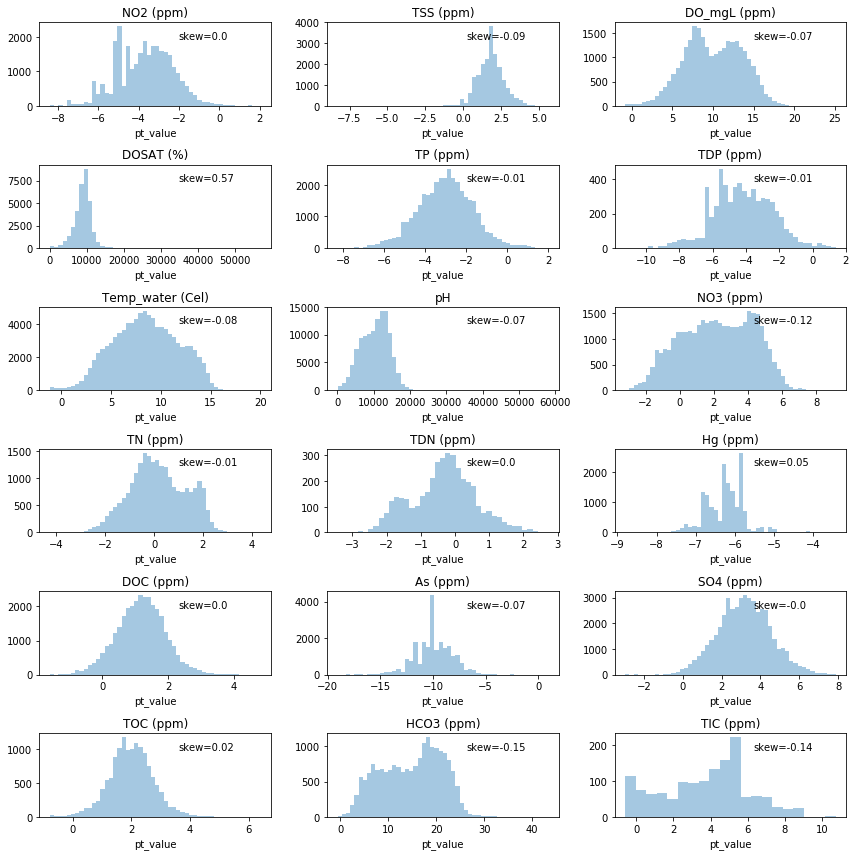

In [25]:
# Create the figure
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(12, 12))

# Loop over parameters and figure axes
for param, ax in zip(params, axes.flat):
    # Subset the values of the parameter
    subset = pt_df[pt_df['param_code'] == param]
    # Create a distribution plot of the values
    sns.distplot(subset['pt_value'], hist=True, kde=False, ax=ax)
    unit = subset['unit'].unique()[0]
    if param == 'pH':
        ax.set_title(param)
    else:
        ax.set_title(param + ' (' + str(unit) + ')')
    # Add the skewness value as text
    skewness = np.around(np.mean(subset['pt_skew']), decimals=2)
    ax.text(0.6, 0.8, s='skew=' + str(skewness), transform=ax.transAxes)

fig.tight_layout()

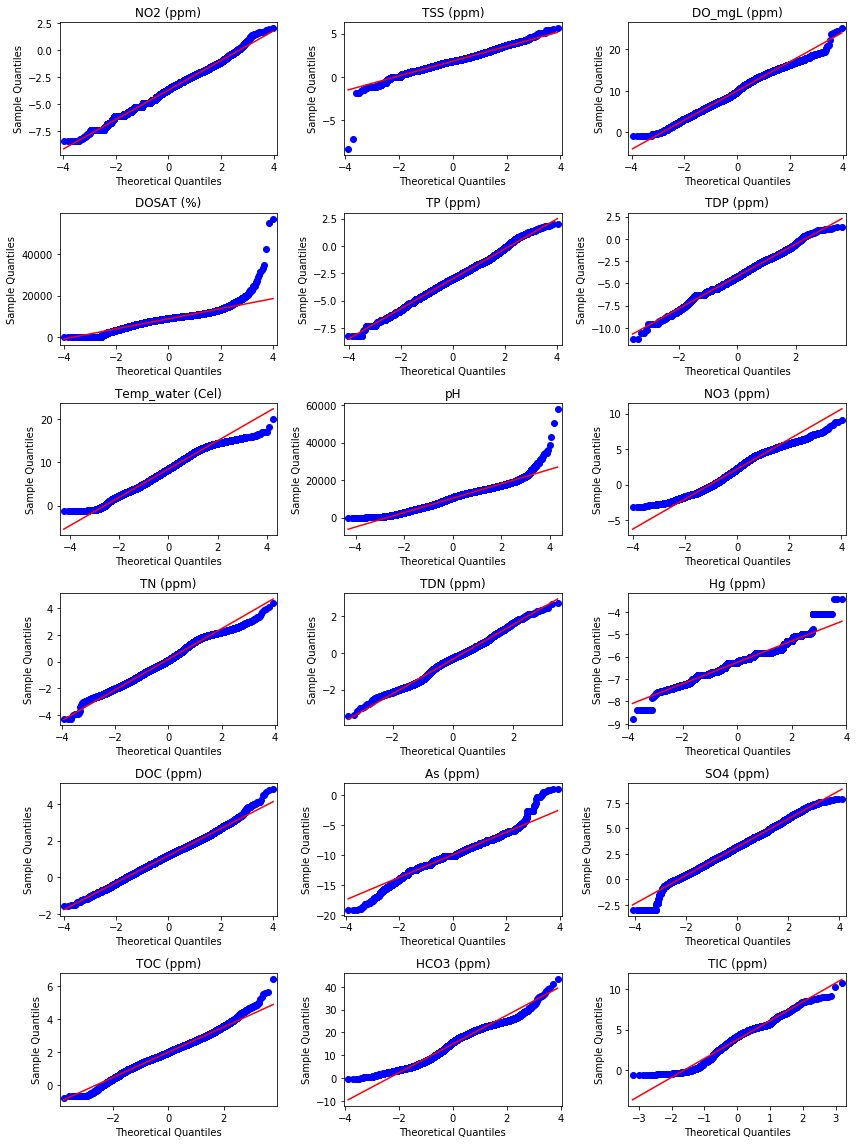

In [26]:
# Create the figure
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(12, 16))

# Loop over parameters and figure axes
for param, ax in zip(params, axes.flat):
    # Subset the values of the parameter
    subset = pt_df[pt_df['param_code'] == param]
    # Create a probability plot of the values
    qqplot(subset['pt_value'], line='s', ax=ax)
    unit = subset['unit'].unique()[0]
    if param == 'pH':
        ax.set_title(param)
    else:
        ax.set_title(param + ' (' + str(unit) + ')')

fig.tight_layout()

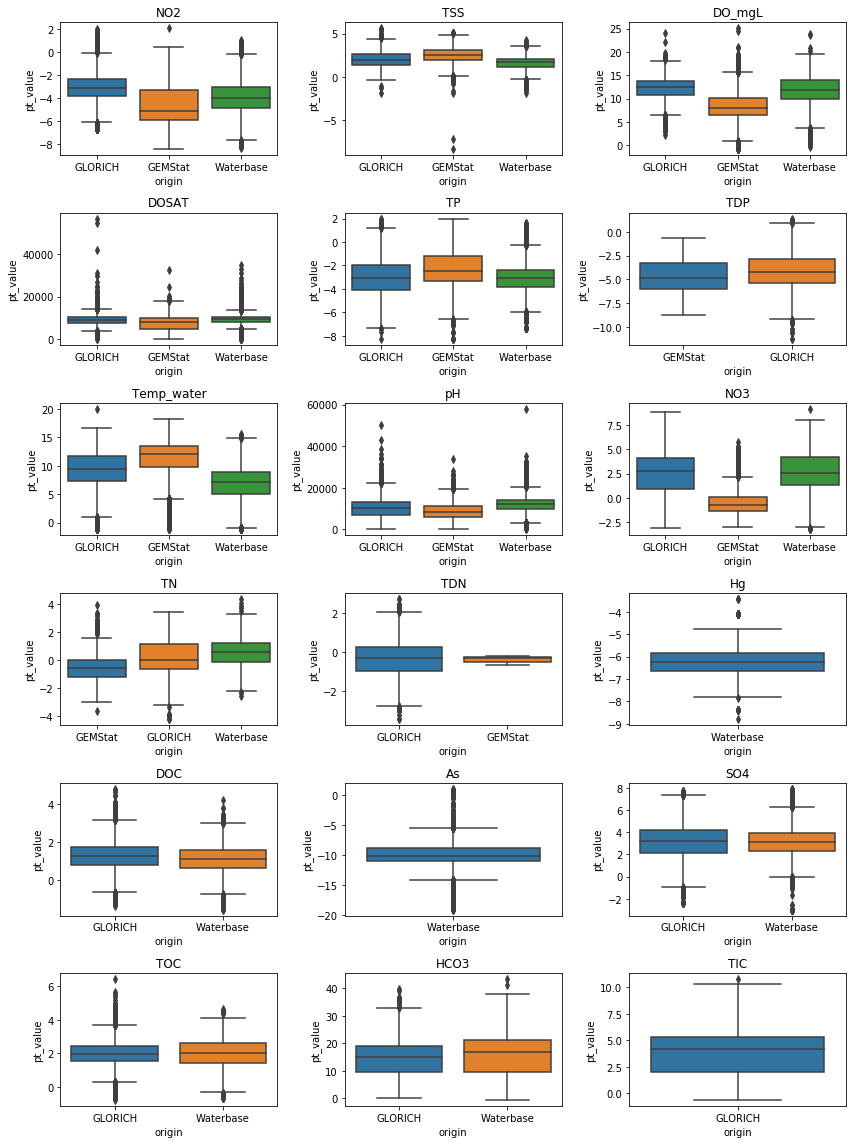

In [28]:
# Create the figure
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(12, 16))

# Loop over parameters and figure axes
for param, ax in zip(params, axes.flat):
    # Subset the values of the parameter
    subset = pt_df[pt_df['param_code'] == param]
    sns.boxplot(x='origin', y='pt_value', data=subset, ax=ax)
    ax.set_title(param)
fig.tight_layout()

In [31]:
df = wq_df.copy()
df['year'] = pd.to_datetime(df['date']).dt.year
print(df['year'].min())
print(df['year'].max())

1942
2017


In [34]:
df.groupby(['year', 'param_code']).count()

lat    lon   date  station_id  param_desc  value   unit  \
year param_code                                                              
1942 HCO3          238    238    238         238         238    238    238   
     NO3           235    235    235         235         235    235    235   
     SO4           228    228    228         228         228    228    228   
     TSS           246    246    246         246         246    246    246   
     pH            248    248    248         248         248    248    248   
1943 HCO3          407    407    407         407         407    407    407   
     NO3           391    391    391         391         391    391    391   
     SO4           419    419    419         419         419    419    419   
     TSS           416    416    416         416         416    416    416   
     pH            418    418    418         418         418    418    418   
1944 HCO3          406    406    406         406         406    406    406   
     NO3           400    400    400         400         400    400    400   
     SO4           420    420    420         420         420    420    420   
     TSS           371    371    371         371         371    371    371   
     pH            417    417    417         417         417    417    417   
1945 HCO3           44     44     44          44          44     44     44   
     NO3            22     22     22          22          22     22     22   
     SO4            43     43     43          43          43     43     43   
     TSS            20     20     20          20          20     20     20   
     pH             44     44     44          44          44     44     44   
1946 HCO3           31     31     31          31          31     31     31   
     NO3            31     31     31          31          31     31     31   
     SO4            26     26     26          26          26     26     26   
     TSS            21     21     21          21          21     21     21   
     pH             31     31     31          31          31     31     31   
1947 HCO3           88     88     88          88          88     88     88   
     NO3            91     91     91          91          91     91     91   
     SO4            87     87     87          87          87     87     87   
     TSS            79     79     79          79          79     79     79   
     pH             90     90     90          90          90     90     90   
...                ...    ...    ...         ...         ...    ...    ...   
2014 Temp_water  21731  21731  21731       21731       21731  21731  21731   
     pH          37280  37280  37280       37280       37280  37280  37280   
2015 As          16653  16653  16653       16653       16653  16653  16653   
     DOC         16365  16365  16365       16365       16365  16365  16365   
     DOSAT       22509  22509  22509       22509       22509  22509  22509   
     DO_mgL      15397  15397  15397       15397       15397  15397  15397   
     HCO3         5858   5858   5858        5858        5858   5858   5858   
     Hg          18787  18787  18787       18787       18787  18787  18787   
     NO2         22352  22352  22352       22352       22352  22352  22352   
     NO3         30274  30274  30274       30274       30274  30274  30274   
     SO4          8419   8419   8419        8419        8419   8419   8419   
     TDP           186    186    186         186         186    186    186   
     TN          14270  14270  14270       14270       14270  14270  14270   
     TOC         11156  11156  11156       11156       11156  11156  11156   
     TP          32299  32299  32299       32299       32299  32299  32299   
     TSS         20740  20740  20740       20740       20740  20740  20740   
     Temp_water  18190  18190  18190       18190       18190  18190  18190   
     pH          35697  35697  35697       35697       35697  35697  35697   
2016 DOSAT         313    313    313     